## **AWS SaaS Sales**
## **Latar Belakang**
Dataset ini menekankan transaksi bisnis pada perusahaan SaaS yang bergerak di bidang penjualan software yang khusus untuk software pencatatan penjualan dan pencatatan marketing, dimana penjualan software tersebut dilakukan secara Bisnis to Bisnis (B2B)
__________________________

## Pernyataan Masalah ##
_____________________

1. Dataset perlu untuk dilakukan pengecekan apakah mempunyai missing value, atau data duplikasi atau masalah pada format.
2. Stakeholder yaitu investors atas SaaS Company, ingin mengetahui bagaimana kinerja perusahaan tersebut selama ini. Direncanakan akan ada investor baru yang akan menyuntikkan modal tambahan apabila kinerja perusahaan dianggap berkinerja baik.


Sebagai seorang data analyst, diusahakan agar menata penyelesaian dari masalah diatas. Penyelesaiannya dengan cara menyiapkan beberapa analisa financial yang mandatory. Yaitu:
1. Membandingkan nilai Sales, dan Profit atas masing-masing Industri.
2. Membandingkan nilai Sales, dan Profit atas masing-masing Segment.
3. Membandingkan nilai Sales, dan Profit atas masing-masing Customer.
Setelah ketiga analisa terpenuhi, akan diberikan beberapa analisa tambahan oleh Stakeholder yang akan dijelaskan dibawah ini.
________________________________

## Data pada Dataframe mengandung beberapa kolom yang akan dijelaskan seperti di bawah ini ##

| Field Name      | Description                                           |
|-----------------|-------------------------------------------------------|
| Row ID          | Identifikasi unik untuk setiap transaksi.             |
| Order ID        | Identifikasi unik untuk setiap pesanan.                   |
| Order Date      | Tanggal saat pesanan ditempatkan.                   |
| Date Key        | Representasi numerik dari tanggal pesanan (YYYY/MM/DD).. |
| Contact Name    | Nama orang yang melakukan pesanan.          |
| Country         | Negara tempat pesanan ditempatkan.               |
| City            | Kota tempat pesanan dilakukan.                  |
| Region          | Wilayah tempat pesanan dilakukan.                |
| Subregion       | Sub-Wilayah tempat pesanan dilakukan.             |
| Customer        | Nama perusahaan yang melakukan pemesanan.        |
| Customer ID     | Identifikasi unik untuk setiap pelanggan.                |
| Industry        | Industri keanggotaan pelanggan.                 |
| Segment         | Segmen pelanggan (SMB, Strategic, Enterprise, etc.). |
| Product         | Produk yang dipesan.                         |
| License         | Kunci lisensi untuk produk.                      |
| Sales           | Jumlah penjualan total untuk transaksi.           |
| Quantity        | Jumlah total barang dalam transaksi.         |
| Discount        | Diskon yang diterapkan pada transaksi.              |
| Profit          | Keuntungan dari transaksi.                      |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss

## Analysis required by the Stakeholder: ##

| Point | Description                                                                                              |
|-------|----------------------------------------------------------------------------------------------------------|
| 1     | Identify industries with the highest software sales revenue                                             |
| 2     | Identify industries with the lowest software sales revenue                                              |
| 3     | Identify segments with the highest software sales revenue                                               |
| 4     | Identify segments with the lowest software sales revenue                                                |
| 5     | Identify products with the highest software sales revenue                                               |
| 6     | Identify industries with the highest software sales profit                                              |
| 7     | Identify segments with the highest software sales profit                                               |
| 8     | Identify products with the highest software sales profit                                               |
| 9     | Determine the customer with the highest sales revenue                                                   |
| 10    | Determine the customer with the highest profit                                                           |
| 11    | Analyze the relationship between sales and profit, conduct Normality tests for Sales, Profit, and Discount, create Scatterplots                    |
| 12    | Analyze the relationship between discount and profit, perform Hypothesis Testing using Pearson/ Spearman, create Scatterplots                             |
| 13    | Analyze the relationship between discount and sales, create Scatterplots                                 |
| 14    | Identify the cities with the lowest sales (2 cities) in order to consider discontinuing sales there   |
| 15    | Determine the country with the highest profit and the corresponding product                              |
| 16    | Analyze annual industry performance in terms of sales from 2020 to 2023 (YoY)                           |
| 17    | Analyze annual industry performance in terms of profit from 2020 to 2023 (YoY)                          |
| 18    | Analyze annual segment performance in terms of sales from 2020 to 2023 (YoY)                            |
| 19    | Analyze annual segment performance in terms of profit from 2020 to 2023 (YoY)                           |



## Data Understanding ##
________________________
Dalam rangka menyelami data yang akan dianalisa, sebaiknya dilakukan data understanding untuk melihat atau mendeteksi adanya  anomali atas data yang diterima.
Pertama mari kita buka datanya dahulu.

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [3]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Secara umum, kita bisa melihat bahwa:

* dataset Saas memiliki 19 kolom dan 9.994 baris

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Dengan menggunakan fungsi info, terlihat format atas data SaaS pada Order Date disini terlihat menggunakan object, sehingga perlu dilakukan penyesuaian untuk convert ke datetime (python) format. 

In [6]:
# Mengganti format date dari object ke DataTime Format
df['Order Date'] = pd.to_datetime(df['Order Date'])


Setelah dilakukan pengecekan ternyata missing value pada data dibawah ini tidak ditemukan

In [7]:
# Pengecekan missing value pada dataset
df.isnull()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
jumlah_missingValue = df.isnull().sum()
jumlah_missingValue

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Setelah dilakukan pengecekan atas ada atau tidaknya duplikasi pada data dibawah, ditemukan bahwa tidak ada data duplikasi.

In [9]:
# Cek apakah ada duplikasi
jumlah_duplikasi = df.duplicated()
jumlah_duplikasi

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [10]:
# Cek apakah ada duplikasi
jumlah_duplikasi = df[(df.duplicated())]
jumlah_duplikasi


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [12]:
df['Contact Name'].unique()

array(['Nathan Bell', 'Deirdre Bailey', 'Zoe Hodges', 'Thomas Hodges',
       'Adrian Hunter', 'Adrian Abraham', 'Emily Morrison',
       'Claire Welch', 'Carol Campbell', 'Blake Hughes', 'Melanie Sharp',
       'Luke Bower', 'Jonathan Ferguson', 'Sam Parsons', 'Neil Gill',
       'Amelia Campbell', 'Chloe Short', 'Jasmine Metcalfe',
       'Karen Mathis', 'Dylan Dickens', 'Sophie Lewis', 'Gavin Mitchell',
       'Katherine Dowd', 'Harry Brown', 'Brian Dickens', 'Joseph Newman',
       'Nicola Howard', 'Stewart Wilson', 'Eric McLean', 'Leah Clarkson',
       'Alison Davidson', 'Sophie Vance', 'Anne Lee', 'Maria Dyer',
       'Julia Ellison', 'Gordon McLean', 'Jessica Buckland',
       'Bernadette Nolan', 'Sonia Ince', 'William Lewis', 'Melanie Young',
       'Edward Oliver', 'Peter Quinn', 'Max Marshall', 'Jan Watson',
       'Carol Ball', 'Gavin Walsh', 'Penelope Peake', 'Amy Scott',
       'Carl Jackson', 'Joe Wallace', 'Luke Mills', 'Alexandra Dyer',
       'Rebecca Dickens', 'Audre

Ada dua kolom yang akan didrop karena tidak relevan dan untuk memudahkan dalam melihat data yang ada. Detailnya ada dibawah ini: 

In [13]:
# Drop kolom yang tidak digunakan
dropColumns = ['Date Key', 'License']
df = df.drop(columns=dropColumns)
df


,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200


Setelah dilakukan pengecekan baik secara data cleaning dan screening tidak ditemukan adanya anomali pada data. Sehingga proses selanjutnya bisa dilakukan yaitu mendeteksi Outliers.

## **Outliers** ##
Sebelum meneruskan ke Analisa, ada baiknya untuk mencari outliers dengan menggunakan Boxplot. Detailnya dapat dilihat dibawah ini:

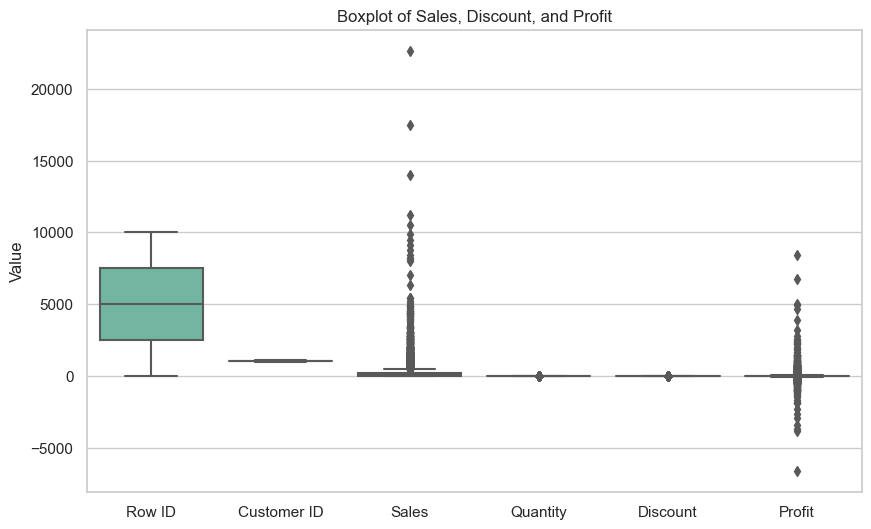

In [14]:
# Mencari Outliers
# df_box = df[['Sales', 'Discount', 'Profit']]

df_box = df[['Sales','Discount','Profit']]

# Create a boxplot for each column
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Boxplot of Sales, Discount, and Profit")
plt.ylabel("Value")


# Show the boxplot
plt.show()


Dari tabel diatas ini, dapat dilihat bahwa terdapat discrepancy/selisih yang cukup tinggi yaitu di bagian grafik Sales dimana terdapat penjualan yang tinggi (outliers) dan pada grafik Profit dimana terdapat kerugian yang cukup tinggi (outliers). Untuk itu perlu dilakukan pengkajian lebih lanjut atas outliers tersebut.

In [15]:
top_10_sales = df['Sales'].nlargest(10)
print("The top 10 maximum values in the 'Sales' column are:\n", top_10_sales)


The top 10 maximum values in the 'Sales' column are:
 2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
9039     9892.740
4098     9449.950
4277     9099.930
8488     8749.950
6425     8399.976
Name: Sales, dtype: float64


Dari sini dapat terlihat terdapat penjualan yang nilainya cukup tinggi, yaitu sebesar 22638.480.

In [16]:

# 3 Penjualan Teratas
top_10_sales = df.nlargest(3, 'Sales')

# Print the 'Sales', 'Customer', and 'Product' for these sales
print("The top 10 maximum values in the 'Sales' column are:")
print(top_10_sales[['Sales', 'Customer', 'Product', 'Order Date', 'Country']])

The top 10 maximum values in the 'Sales' column are:
         Sales                Customer          Product Order Date  Country
2697  22638.48                  Anthem  Big Ol Database 2020-03-18  Germany
6826  17499.95               Coca-Cola          Alchemy 2022-10-03    India
8153  13999.96  Mondelez International          Alchemy 2023-03-24   Canada


Dari penjelasan diatas terlihat Anthem Company melakukan pembelian produk Big Ol Database tertanggal 18 Maret 2020 dengan nilai penjualan yang tertinggi dan memiliki selisih yang cukup jauh.

In [17]:
# Get the bottom 3 profits
bottom_3_profits = df.nsmallest(3, 'Profit')

# Print the 'Profit', 'Customer', 'Product', 'Order Date', and 'Country' for these profits
print("The bottom 3 values in the 'Profit' column are:")
print(bottom_3_profits[['Profit','Sales','Discount' ,'Customer', 'Product', 'Order Date', 'Country']])

The bottom 3 values in the 'Profit' column are:
         Profit     Sales  Discount          Customer          Product  \
7772 -6599.9780  4499.985       0.7          Allstate  Big Ol Database   
683  -3839.9904  7999.980       0.5  Costco Wholesale  Big Ol Database   
9774 -3701.8928  2177.584       0.8             Bosch   ContactMatcher   

     Order Date Country  
7772 2022-11-26  Mexico  
683  2023-11-05  Sweden  
9774 2020-07-26   Japan  


 Kemudian dari penjelasan diatas ini, perusahaan juga mencatatkan penjualan ke Allstate Company mengalami kerugian yang cukup besar yaitu -6599.9780. 

## **Finding** ##
1. Dari data diatas dapat dilihat, terdapat outliers pada data sebaran data disebabkan karena ada pembelian oleh Anthem Company berasal dari Jerman, dimana Anthem membeli product Big Ol Database pada tanggal 18 Mar 2020 dengan nilai 22638.48. Dari sini dapat disimpulkan bahwa walaupun Anthem Company melakukan pembelian dengan nilai yang tinggi namun tidak ditemukan indikasi kesalahan data, dan nilainya masih tidak terlalu signifikan.

2. Dari data diatas, untuk outliers yang berupa kerugian, dapat dijelaskan bahwa terdapat pembelian oleh Allstate Company sebesar 4499.985 atas produk Big Ol Database, dengan menyebabkan kerugian pada perusahaan sebesar -6599.97. Salah satu faktor yang dapat menyebabkan kerugian adalah variable discount yang mencapai 0.7. Hal ini biasa dalam dunia bisnis, discount adalah salah satu upaya untuk menarik calon pembeli.

## **Data Analysis and Visualization** ##

Sebelum melakukan analisa lebih jauh, persebaran data  perlu diuji menggunakan Uji Normalitas yakni melingkupi Sales, Discount dan Profit. Uji Normalitas untuk mengetahui persebaran distribusi normal atau tidak ini dilakukan agar dapat diketahui persebarannya, sehingga untuk analisa korelasi atas Prodit dan diskon, akan mendasarkan dari uji Normalitas. Untuk pengujian Normalitas sendiri menggunakan metode KS (Kolmogorov Smirnov)

In [18]:
# Uji Normal untuk Sales, Discount dan Profit
Sales_Data = df['Sales']
Discount_Data = df['Discount']
Profit_Data = df['Profit']

ks_statistic_sales, p_value_sales = ss.kstest(Sales_Data,'norm', args=(Sales_Data.mean(), Sales_Data.std()))
ks_statistic_discount, p_value_discount = ss.kstest(Discount_Data,'norm', args=(Discount_Data.mean(), Discount_Data.std()))
ks_statistic_profit, p_value_profit = ss.kstest(Profit_Data,'norm', args=(Profit_Data.mean(), Profit_Data.std()))

# Signifikasi Alpha
alpha = 0.05

# Mengetest apakah Nilai Sales mengikuti distribusi normal dengan melihat pada p_value Nya

if p_value_sales > alpha:
    print(f'ks_statistic, p_value = {ks_statistic_sales:.4f},{ p_value_sales:.4f}, Sales mengikuti sebaran distribusi normal (gagal tolak H0)')
else:
    print(f'ks_statistic, p_value = {ks_statistic_sales:.4f},{ p_value_sales:.4f}, Sales tidak mengikuti sebaran distribusi normal (tolak H0)')
    
# Mengetest apakah Nilai Discount mengikuti distribusi normal dengan melihat pada p_value Nya

if p_value_discount > alpha:
    print(f'ks_statistic, p_value = {ks_statistic_discount:.4f},{ p_value_discount:.4f}, Discount mengikuti sebaran distribusi normal (gagal tolak H0)')
else:
    print(f'ks_statistic, p_value = {ks_statistic_discount:.4f},{ p_value_discount:.4f}, Discount tidak mengikuti sebaran distribusi normal (tolak H0)')

# Mengetest apakah Nilai Profit mengikuti distribusi normal dengan melihat pada p_value Nya

if p_value_profit > alpha:
    print(f'ks_statistic, p_value = {ks_statistic_profit:.4f},{ p_value_profit:.4f}, Profit mengikuti sebaran distribusi normal (gagal tolak H0)')
else:
    print(f'ks_statistic, p_value = {ks_statistic_profit:.4f},{ p_value_profit:.4f}, Profit tidak mengikuti sebaran distribusi normal (tolak H0)')


ks_statistic, p_value = 0.3564,0.0000, Sales tidak mengikuti sebaran distribusi normal (tolak H0)
ks_statistic, p_value = 0.2766,0.0000, Discount tidak mengikuti sebaran distribusi normal (tolak H0)
ks_statistic, p_value = 0.3308,0.0000, Profit tidak mengikuti sebaran distribusi normal (tolak H0)


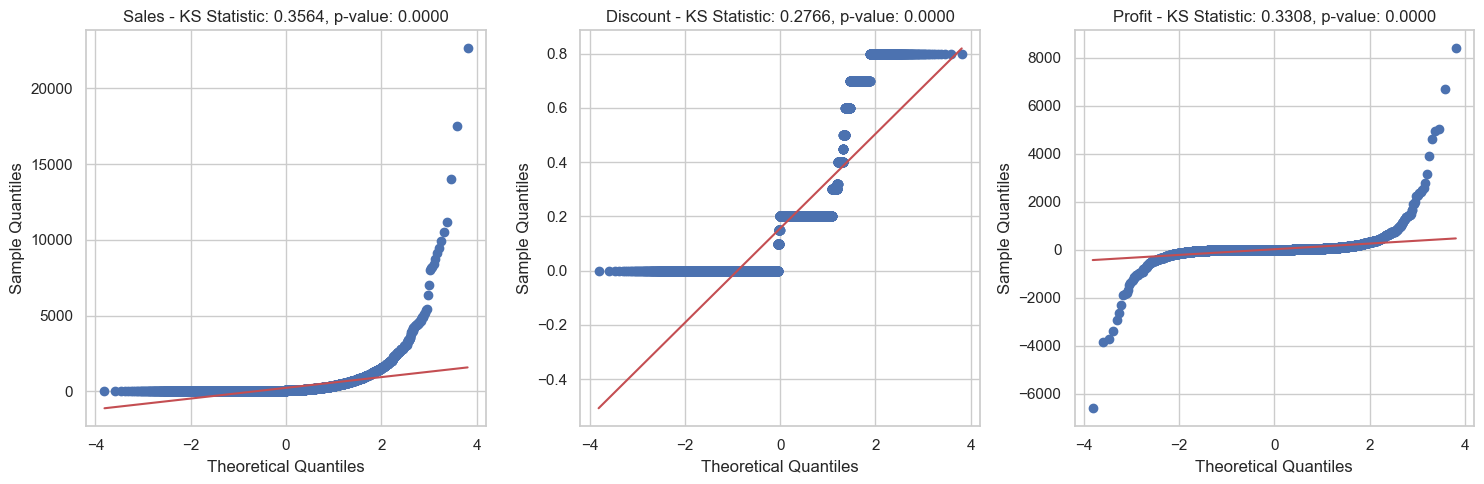

In [19]:
# Q-Q plot untuk uji Normalitas
# Data Dasar
Sales_Data = df['Sales']
Discount_Data = df['Discount']
Profit_Data = df['Profit']

# Tentukan ukuran
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Tentukan Q-Q plots untuk penjualan
ss.probplot(Sales_Data, plot=axes[0], dist='norm', fit=True)
axes[0].set_title(f'Sales - KS Statistic: {ks_statistic_sales:.4f}, p-value: {p_value_sales:.4f}')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')

# Tentukan Q-Q plots untuk Discount
ss.probplot(Discount_Data, plot=axes[1], dist='norm', fit=True)
axes[1].set_title(f'Discount - KS Statistic: {ks_statistic_discount:.4f}, p-value: {p_value_discount:.4f}')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')

# Tentukan Q-Q plots profit
ss.probplot(Profit_Data, plot=axes[2], dist='norm', fit=True)
axes[2].set_title(f'Profit - KS Statistic: {ks_statistic_profit:.4f}, p-value: {p_value_profit:.4f}')
axes[2].set_xlabel('Theoretical Quantiles')
axes[2].set_ylabel('Sample Quantiles')

# Display the plots
plt.tight_layout()
plt.show()


Dari hasil Uji Normalitas yang telah dilakukan diatas, dapat disimpulkan bahwa untuk variabel Sales, Profit dan Discount, tidak mengikuti sebaran distribusi normal.

In [20]:
# 5 Industry penghasil Sales Terbesar Secara Akumulasi.

# Mengelompokkan penjualan Industri yang  terbesar
industry_sales = df.groupby('Industry')['Sales'].sum()

# Sort menjadi 5 terbesar
sorted_industries = industry_sales.sort_values(ascending=False)

# Menampilkan 5 industries with the biggest sales
top_5_industries = sorted_industries.head(5)

top_5_industries


Industry
Finance          474150.4844
Energy           304644.1409
Manufacturing    295192.3812
Healthcare       273183.2882
Tech             263169.0277
Name: Sales, dtype: float64

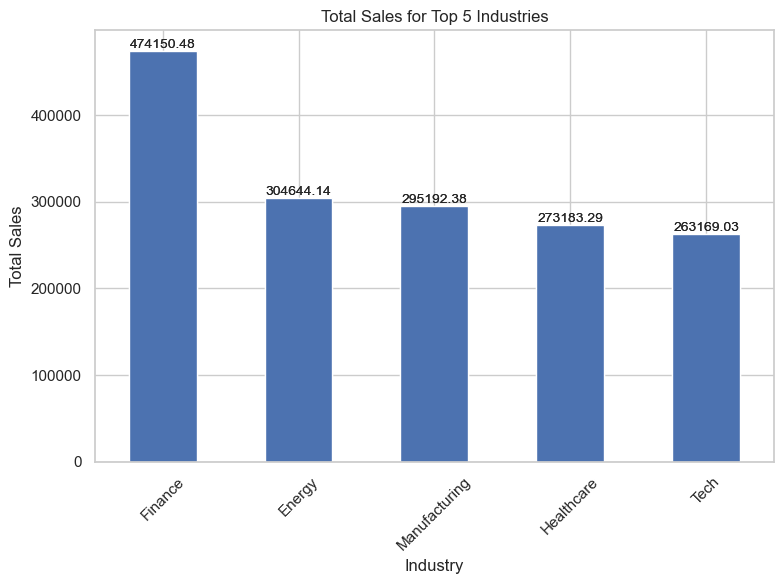

In [21]:
# 5 Industri yang menghasilkan pendapatan/ penjualan terbsesar

top_5_industries.plot(kind='bar', figsize=(8, 6))
ax = top_5_industries.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 5 Industries')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)


plt.tight_layout()
plt.show()


**Finance merupakan Industri yang memberikan sumbangsih Penjualan terbesar bagi perusahaan, disusul dengan Industri seperti Energi, Manufacturing, Healthcare dan posisi kelima Teknoogi.**  

In [22]:
# Industri yang menghasilkan Sales terkecil secara Akumulasi.
low_sorted_industries = industry_sales.sort_values(ascending=True)
lowest_5_industries = sorted_industries.tail(5)
lowest_5_industries

Industry
Consumer Products    224044.1422
Retail               223072.0720
Communications       120962.2365
Transportation        90191.3276
Misc                  28591.7596
Name: Sales, dtype: float64

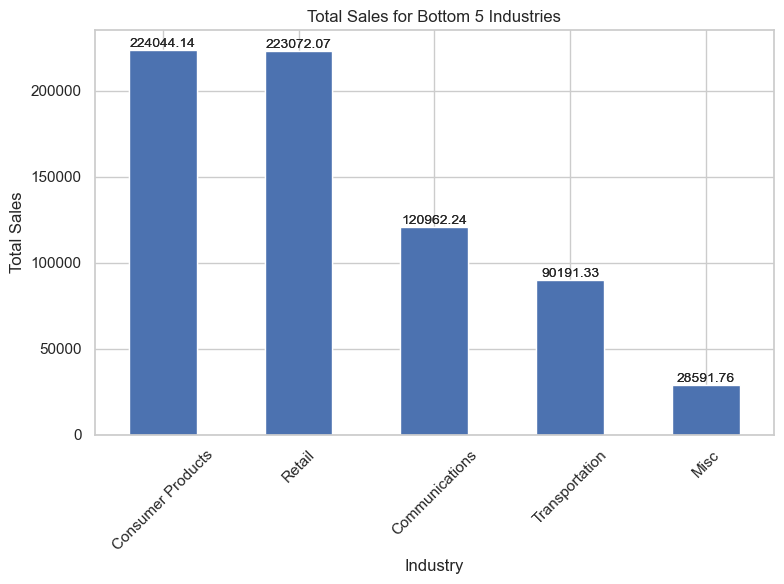

In [23]:
# 5 Industri yang menghasilkan pendapatan/ penjualan terendah
lowest_5_industries.plot(kind='bar', figsize=(8, 6))
ax_1 = lowest_5_industries.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Total Sales')
plt.title('Total Sales for Bottom 5 Industries')
plt.xticks(rotation=45)
for p in ax_1.patches:
    ax_1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Sedangkan yang paling sedikit menghasilkan Penjualan bagi perusahaan adalah Industri lain atau disebut Miscelaneous, disusul oleh Transportasi dan Komunikasi.**

In [24]:
# Segment Penghasil Penjualan Terbesar Secara Akumulasi. 
# Mengelompokkan data menjadi segment, dan menjumlahkan masing2 segment
segment_sales = df.groupby('Segment')['Sales'].sum()

# Sort segment dan urutkan dari yang paling besar
sorted_segments = segment_sales.sort_values(ascending=False)

# Menyimpulkan menjadi  segment penghasil penjualan paling besar
top_segments = sorted_segments.head()

top_segments

Segment
SMB           1.161401e+06
Strategic     7.061464e+05
Enterprise    4.296531e+05
Name: Sales, dtype: float64

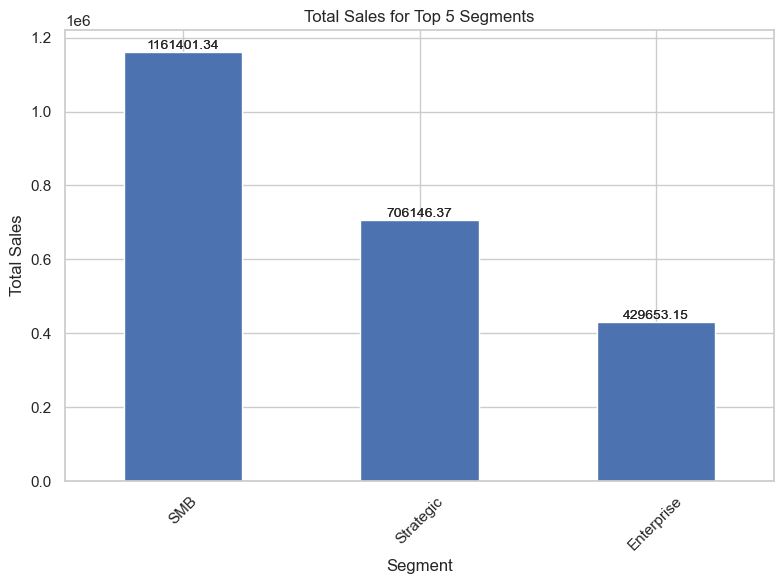

In [25]:
# 'Top_3_Segments' yang mempunyai Penjualan Terbesar

top_segments.plot(kind='bar', figsize=(8, 6))
ax_2 = top_segments.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 5 Segments')
plt.xticks(rotation=45)
for p in ax_2.patches:
    ax_2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Dari sisi Segment, SMB (Small Medium Business) merupakan segment yang paling besar Penjualannya, disusul oleh Segment Strategic dan Enterprise.**

In [26]:
# Segment Penghasil Penjualan Terkecil Secara Akumulasi. 
lowest_sorted_segments = segment_sales.sort_values(ascending=True)
lowest_sales_segment = sorted_segments.tail(3)
lowest_sales_segment

Segment
SMB           1.161401e+06
Strategic     7.061464e+05
Enterprise    4.296531e+05
Name: Sales, dtype: float64

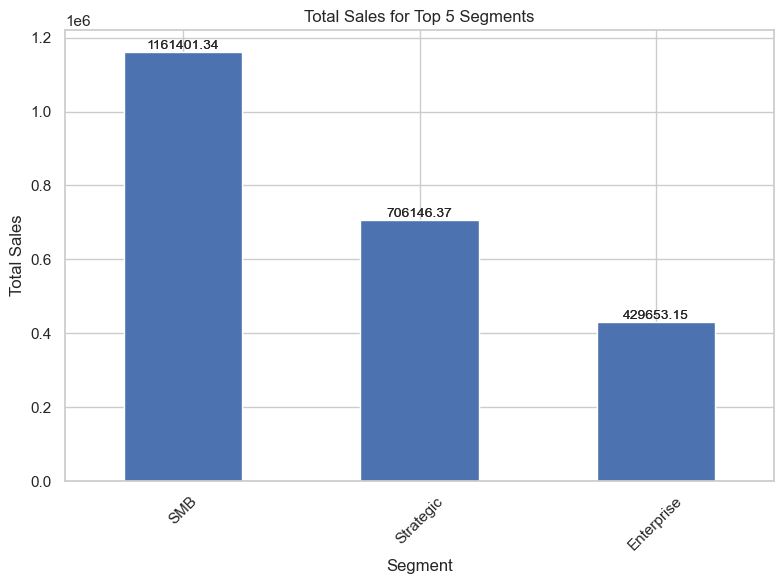

In [27]:
# 'Top_3_Segments' yang mempunyai Penjualan Terkecil

lowest_sales_segment.plot(kind='bar', figsize=(8, 6))
ax_2 = lowest_sales_segment.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 5 Segments')
plt.xticks(rotation=45)
for p in ax_2.patches:
    ax_2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Untuk Segment, Enterprise menempati posisi paling bawah kontribusinya dalam menghasilkan Penjualan bagi perusahaan.**

In [28]:
# Top 5 Product berdasarkan Penjualannya
# Mengelompokkan penjualan produk dan menjumlahkannya
product_sales = df.groupby('Product')['Sales'].sum()

# Find the product with the maximum total sales
sorted_product = product_sales.sort_values(ascending=False)

# Get the maximum total sales value
top_product = sorted_product.head()

top_product

Product
ContactMatcher            410378.265
FinanceHub                340935.415
Site Analytics            330007.054
Marketing Suite - Gold    223843.608
Big Ol Database           189238.631
Name: Sales, dtype: float64

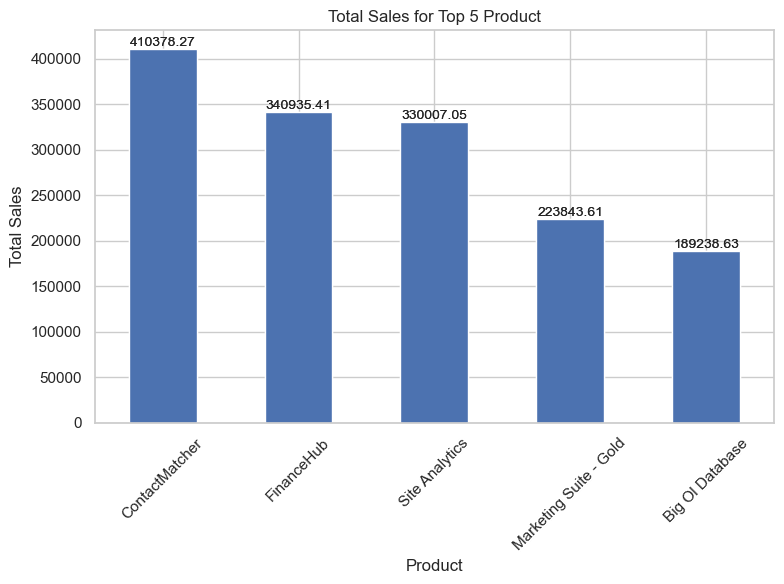

In [29]:
# 'Top_5_Products' yang mempunyai Penjualan Tertinggi

top_product.plot(kind='bar', figsize=(8, 6))
ax_2 = top_product.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 5 Product')
plt.xticks(rotation=45)
for p in ax_2.patches:
    ax_2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Masih untuk penghasil Penjualan terbesar, kini untuk produknya, yaitu ContactMatcher menduduki peringkat pertama yang menghasilkan penjualan terbesar, disusul oleh FinanceHub dan Site Analytics**

In [30]:
# 5 Industry penghasil Profit Terbesar

# Mengelompokkan Profitable Industri yang  terbesar
industry_profit = df.groupby('Industry')['Profit'].sum()

# Sort menjadi 5 terbesar
sorted_industries = industry_profit.sort_values(ascending=False)

# Menampilkan 5 industries with the biggest profit
top_5_profitable_industries = sorted_industries.head(5)

top_5_profitable_industries

Industry
Finance              50348.9696
Energy               45282.3137
Manufacturing        38413.1064
Consumer Products    37018.0077
Healthcare           31969.0932
Name: Profit, dtype: float64

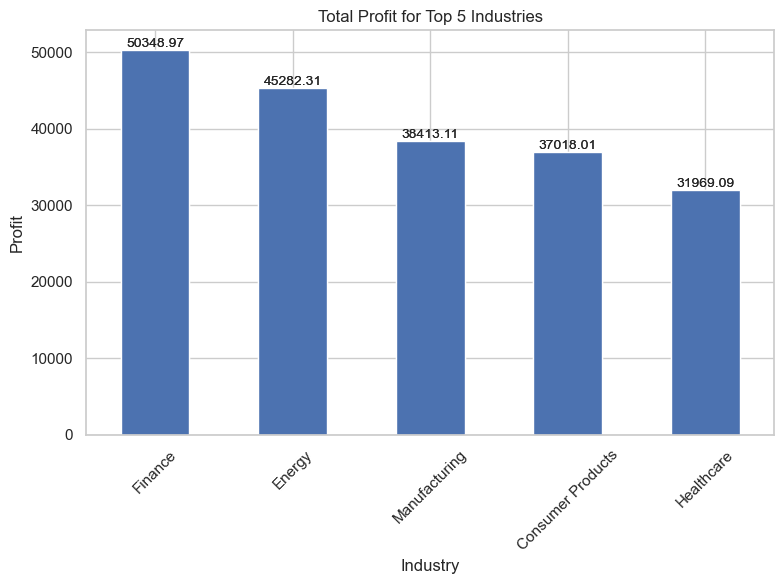

In [31]:
# 'Top_5_Industri' yang mempunyai Laba/ Keuntungan Tertinggi Secara Akumulasi

top_5_profitable_industries.plot(kind='bar', figsize=(8, 6))
ax_2 = top_5_profitable_industries.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Profit')
plt.title('Total Profit for Top 5 Industries')
plt.xticks(rotation=45)
for p in ax_2.patches:
    ax_2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Keuntungan terbesar untuk periode 2020-2023 diraih oleh Industry Finance diikuti oleh Energy diposisi kedua dan Manufaktur untuk posisi ketiganya.**

In [32]:
# 3 Segment terbesar yang menghasilkan Profit
# Mengelompokkan data menjadi segment, dan menjumlahkan masing2 segment
segment_profit = df.groupby('Segment')['Profit'].sum()

# Sort segment dan urutkan dari yang paling besar
sorted_segments = segment_profit.sort_values(ascending=False)

# Menyimpulkan menjadi  segment penghasil profit paling besar
top_profitable_segments = sorted_segments.head()

top_profitable_segments

Segment
SMB           134119.2092
Strategic      91979.1340
Enterprise     60298.6785
Name: Profit, dtype: float64

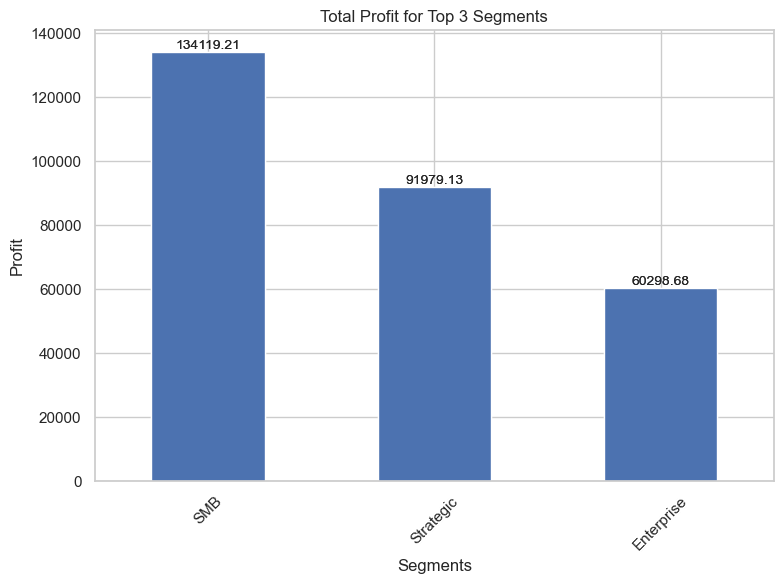

In [33]:
# 'Top_3_Segments' yang mempunyai Laba/ Keuntungan Tertinggi Secara Akumulasi

top_profitable_segments.plot(kind='bar', figsize=(8, 6))
ax_2 = top_profitable_segments.plot(kind='bar')
plt.xlabel('Segments')
plt.ylabel('Profit')
plt.title('Total Profit for Top 3 Segments')
plt.xticks(rotation=45)
for p in ax_2.patches:
    ax_2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Penyumbang Keuntungan terbesar berasal dari segment SMB, kemudian disusul oleh Strategic dan Enterprise untuk posisi ketiga**  

In [34]:
# Product mana saja yang menghasilkan profit terbesar dari penjualan software
# Mengelompokkan profit per produk dan menjumlahkannya
product_profit = df.groupby('Product')['Profit'].sum()

# Sort produk berdasarkan nilai profitnya
sorted_profitable_product = product_profit.sort_values(ascending=False)

# Menetapkan product dengan nilai profit terbesar
top_profitable_product = sorted_profitable_product.head()

top_profitable_product

Product
Alchemy           55617.8249
Site Analytics    44515.7306
Data Smasher      41936.6357
Support           32864.4698
FinanceHub        32136.4203
Name: Profit, dtype: float64

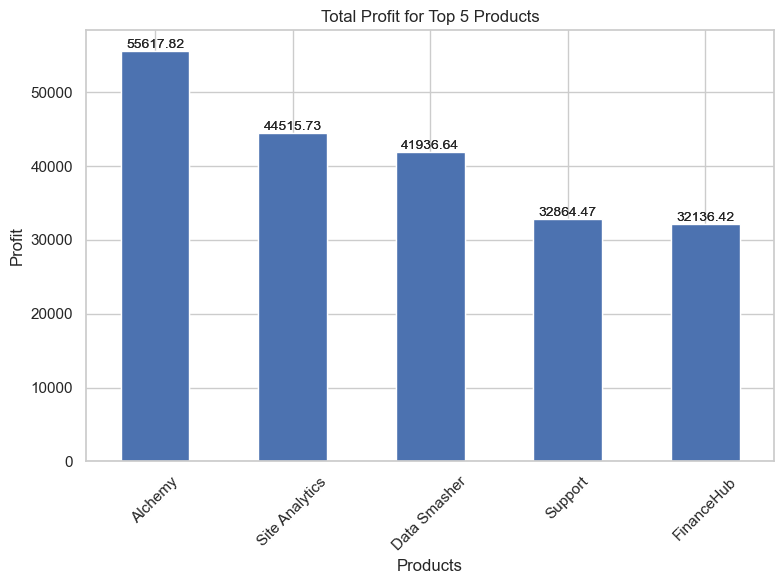

In [35]:
# 'Top_5_Products' yang mempunyai Laba/ Keuntungan Tertinggi Secara Akumulasi

top_profitable_product.plot(kind='bar', figsize=(8, 6))
ax_2 = top_profitable_product.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Profit')
plt.title('Total Profit for Top 5 Products')
plt.xticks(rotation=45)
for p in ax_2.patches:
    ax_2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Tidak seperti Sales, Produk yang memimpin dalam menghasilkan Laba/ Keuntungan bagi Perusahaan adalah Alchemy di posisi pertama, disusul Site Analytics dan Data Data Smasher untuk posisi kedua dan ketiga secara berurutan.**

In [36]:
# Melihat breakdown Industry yang terdapat dalam data
df['Industry'].unique()

array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

In [37]:
# Melihat breakdown Customer yang terdapat dalam data
df['Customer'].unique()

array(['Chevron', 'Phillips 66', 'Royal Dutch Shell', 'BNP Paribas',
       'Engie', 'Microsoft', 'Pfizer', 'Toyota Motor', 'Home Depot',
       'Wells Fargo', 'Carrefour', 'Costco Wholesale', 'McKesson',
       'Siemens', 'Intel', 'Glencore', 'Procter & Gamble',
       'Banco Santander', 'Pemex', 'Samsung Electronics', 'Sony',
       'Morgan Stanley', 'Bank of America Corp.', 'Tesco', 'Aviva',
       'Mondelez International', 'Abbott Laboratories', 'Fannie Mae',
       'Aetna', 'Oracle', 'Nissan Motor', 'Tyson Foods',
       'Verizon Communications', 'Itochu', 'Daimler', 'Walgreens',
       'Boeing', 'Valero Energy', 'Nestle', 'Philip Morris International',
       'Trafigura Group', 'Walmart', 'Cisco Systems',
       'Prudential Financial', 'Amazon', 'Gazprom', 'FedEx',
       'Honda Motor', 'CVS Health', 'General Motors',
       'State Farm Insurance Cos.', 'Comcast', 'AmerisourceBergen',
       'Johnson & Johnson', 'HonHai Precision Industry',
       'American Express', 'J.P. Morgan

In [38]:
# 5 Customer pemberi Penjualan/ Sales Terbesar

# Mengelompokkan penjualan Industri yang  terbesar
customer_sales = df.groupby('Customer')['Sales'].sum()

# Sort menjadi 5 terbesar
sorted_customer = customer_sales.sort_values(ascending=False)

# Menampilkan 5 customer with the biggest sales
top_5_customer = sorted_customer.head(5)

top_5_customer

Customer
Anthem                   55719.2100
Ford Motor               43893.0424
Allianz                  42904.1670
Bank of America Corp.    41255.9471
Valero Energy            41220.4188
Name: Sales, dtype: float64

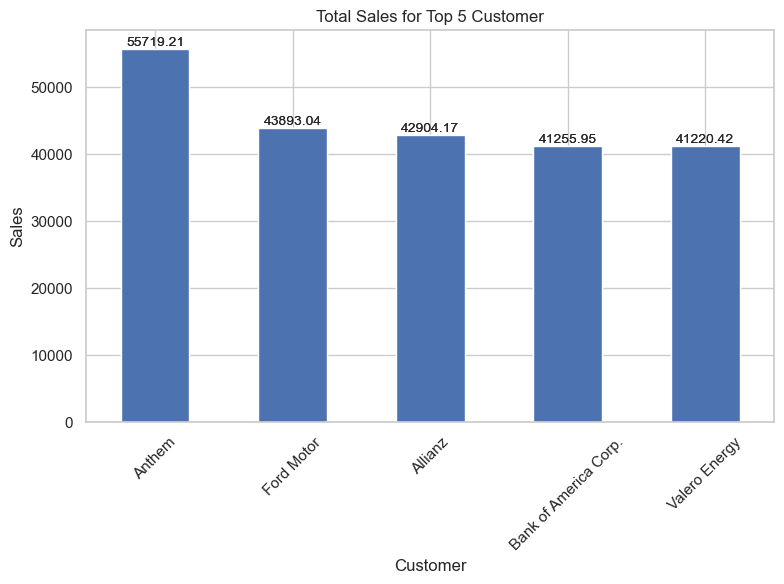

In [39]:
# 'Top_5_Customers' yang mempunyai Sales/ Penjualan Tertinggi Secara Akumulasi

top_5_customer.plot(kind='bar', figsize=(8, 6))
ax_2 = top_5_customer.plot(kind='bar')
plt.xlabel('Customer')
plt.ylabel('Sales')
plt.title('Total Sales for Top 5 Customer')
plt.xticks(rotation=45)
for p in ax_2.patches:
    ax_2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Customer yang menghasilkan Sales/ Penjualan terbesar adalah Anthem yang berada di posisi teratas, disusul oleh Ford Motor di posisi kedua, dan Allianz untuk posisi ketiga** 

In [40]:
# 5 Customer penghasil Profit Terbesar

# Mengelompokkan Profitable Customer yang  terbesar
customer_profit = df.groupby('Customer')['Profit'].sum()

# Sort menjadi 5 terbesar
sorted_profitable_customer = customer_profit.sort_values(ascending=False)

# Menampilkan 5 Customer with the biggest profit
top_5_profitable_customer = sorted_profitable_customer.head(5)

top_5_profitable_customer

Customer
Valero Energy             10308.6297
Coca-Cola                  9449.0246
Trafigura Group            8867.8252
Mondelez International     8577.6524
Lowes                      7937.4915
Name: Profit, dtype: float64

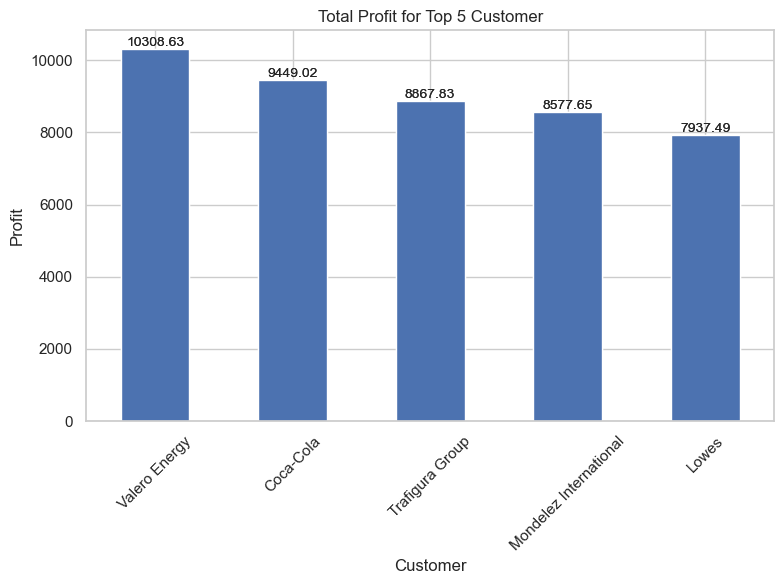

In [41]:
# 'Top_5_Customers' yang mempunyai Laba/ Keuntungan Tertinggi Secara Akumulasi

top_5_profitable_customer.plot(kind='bar', figsize=(8, 6))
ax_2 = top_5_profitable_customer.plot(kind='bar')
plt.xlabel('Customer')
plt.ylabel('Profit')
plt.title('Total Profit for Top 5 Customer')
plt.xticks(rotation=45)
for p in ax_2.patches:
    ax_2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha='center', 
                  va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Customer yang memberikan sumbangsih Laba/ Keuntungan terbesar adalah Valero Energy duduk diperingkat pertama, disusul oleh  Coca-Cola di posisi kedua, dan Trafigura Group untuk posisi ketiganya.** 

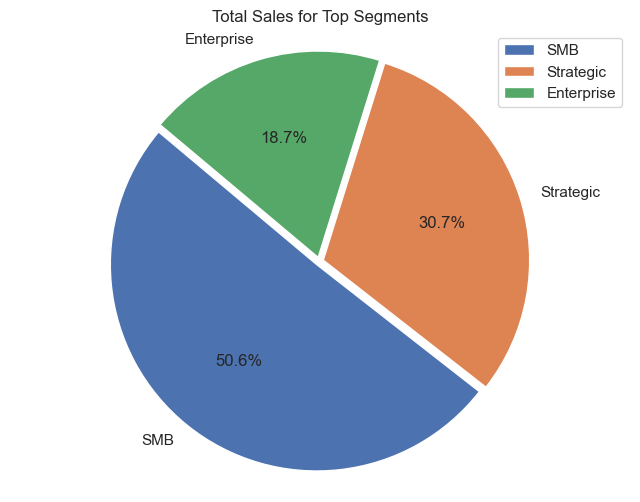

In [42]:
# 'Top_3_Segments' dilihat secara proporsional

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_segments, labels=top_segments.index, autopct='%1.1f%%', startangle=140, explode= (0.02, 0.02, 0.02))

# Add title
plt.title('Total Sales for Top Segments')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()


Setelah sebelumnya telah dilakukan pengujian normalitas dengan hasil data persebaran tidak mengikuti distribusi normal, maka untuk pengujian korelasi untuk variabel Sales, Profit dan Discount dilakukan dengan menggunakan uji Non-Parametrik, dikasus ini menggunakan metode Spearman, seperti yang dapat dilihat dibawah ini. 

In [43]:
# Uji Korelasi antara discount dan profit
Discount_Data = df['Discount']
Profit_Data = df['Profit']

# Menjalankan Spearman Correlation Test
correlation_coefficient, p_value = ss.spearmanr(Discount_Data, Profit_Data)

# Menentukan hubungan korelasinya
if correlation_coefficient > 0:
    correlation_strength = "positive"
elif correlation_coefficient < 0:
    correlation_strength = "negative"
else:
    correlation_strength = "none"

# Menginterprestasikan hasilnya
print(f"Spearman Rank Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Strength of Correlation: {correlation_strength}")

# Kesimpulan atas P_value
alpha = 0.05  # Level Signifikansi
if p_value < alpha:
    print("The Spearman rank correlation between 'Discount' and 'Profit' is statistically significant (reject H0)")
else:
    print("The Spearman rank correlation between 'Discount' and 'Profit' is not statistically significant (fail to reject H0)")


Spearman Rank Correlation Coefficient: -0.5434
P-Value: 0.0000
Strength of Correlation: negative
The Spearman rank correlation between 'Discount' and 'Profit' is statistically significant (reject H0)


Maka untuk pengujian korelasinya menggunakan Spearman. Jadi hasil uji korelasinya adalah "The Spearman rank correlation between 'Discount' and 'Profit' is statistically significant (reject H0)"

<Axes: xlabel='Sales', ylabel='Profit'>

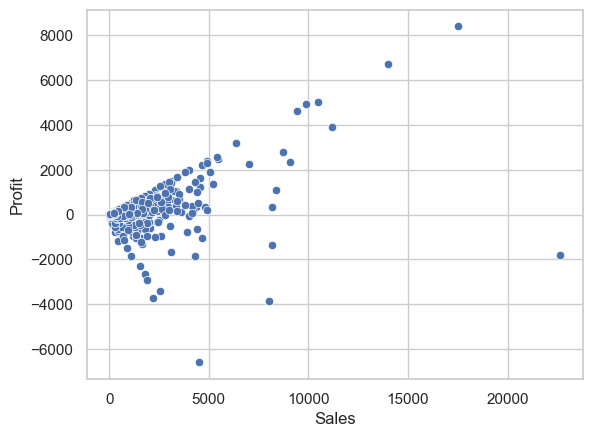

In [44]:
# Melihat hubungan korelasi antara Sales dan Profit
sns.scatterplot(
    data=df,
    x='Sales',
    y = 'Profit')

<Axes: xlabel='Discount', ylabel='Sales'>

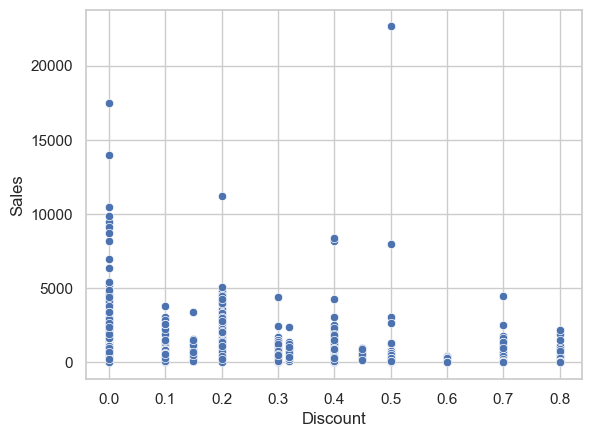

In [45]:
# Melihat hubungan antara Sales dan Discount
sns.scatterplot(
    data=df,
    x='Discount',
    y = 'Sales')

<Axes: xlabel='Discount', ylabel='Profit'>

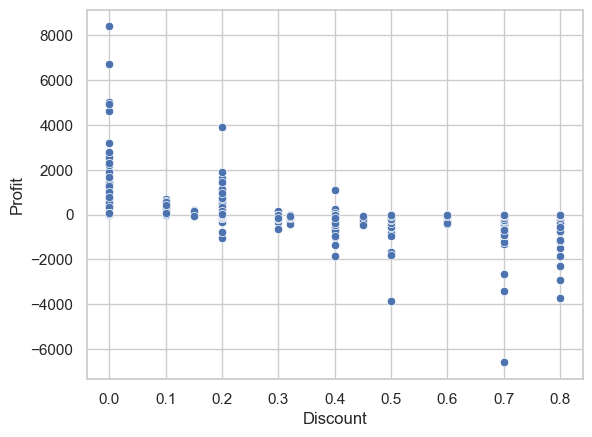

In [46]:
# Melihat hubungan antara Profit dan Discount
sns.scatterplot(
    data=df,
    x='Discount',
    y = 'Profit')

**Seperti yang telah dijelaskan diatas, korelasi antara Discount dan Profit adalah significant, artinya pengaruh discount terhadap pengurangan Profit sangat berpengaruh. Hal ini dapat dilihat pada grafik diatas ini.** 

In [47]:
# 5 Kota Penghasil Sales Terendah
result_city_lowest = df.groupby(['City','Product'])['Sales'].sum().reset_index()
result_city_lowest_sorted = result_city_lowest.sort_values(by='Sales', ascending=True)
five_city_lowest = result_city_lowest_sorted.head()
five_city_lowest

,City,Product,Sales
358,Cape Town,Data Smasher,1.584
1583,San Antonio,Storage,1.810
1275,Naples,Storage,1.810
216,Bologna,Data Smasher,1.980
330,Cairo,SaaS Connector Pack - Gold,2.040


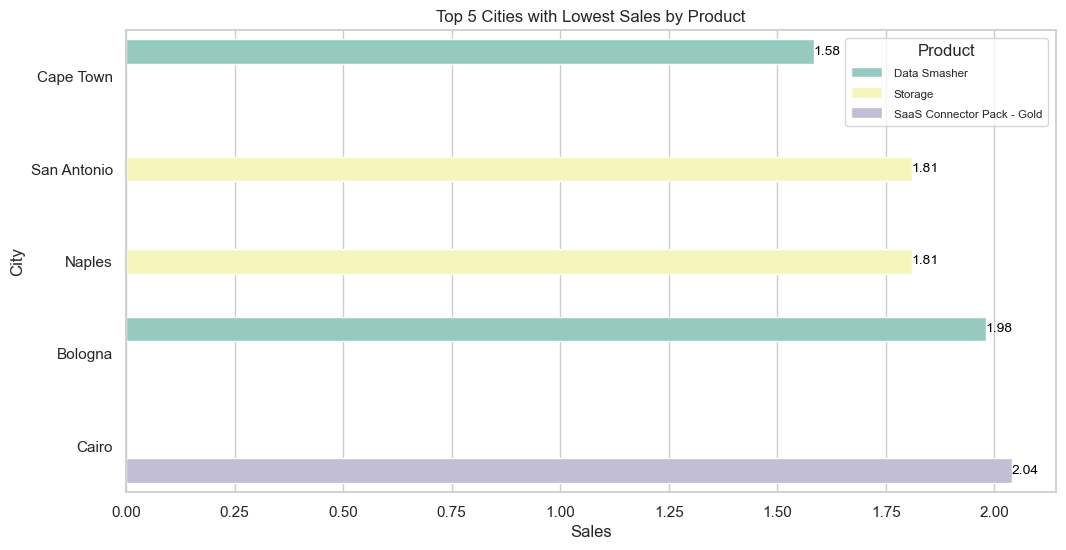

In [48]:
# 5 Kota Penghasil Sales Terendah beserta produknya

# Limit the DataFrame to the top 5 cities and products
top_5_city_product = five_city_lowest.nsmallest(5, 'Sales')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Sales', y='City', hue='Product', data=top_5_city_product, palette='Set3')
plt.xlabel('Sales')
plt.ylabel('City')
plt.title('Top 5 Cities with Lowest Sales by Product')
# Adjust the legend font size to be smaller
legend = plt.legend(title='Product')
for label in legend.get_texts():
    label.set_fontsize('x-small')


# Annotate the bars with the sales values
for p in ax.containers:
    ax.bar_label(p, fmt='%.2f', fontsize=10, color='black')

plt.show()


**Dari grafik ini terlihat 5 kota ini sebagai penghasil Sales terendah, yaitu paling rendah adalah Cape Town yang berada di Afrika, disusul oleh San Antonio yang ada di Amerika Serikat, kemudian Naples dan Bologna yang berlokasi di Itay dan terakhir adalah Cairo yang dimana adalah ibukota Mesir. Mengacu kepada salah satu tujuan stakeholders yaitu bermaksud menutup salah satu lini bisnisnya pada kota yang menghasilkan penjualan terkecil, sebagai data analyst merekomendasikan untuk menutup lini bisnis di Cape Town.**

In [49]:
# Kota Penghasil Sales Terbesar beserta Produkya
result_biggest = df.groupby(['City','Product'])['Sales'].sum().reset_index()
result_biggest_sorted = result_biggest.sort_values(by='Sales', ascending=False)
top_biggest_10_category = result_biggest_sorted.head(10)
top_biggest_10_category

,City,Product,Sales
1012,London,FinanceHub,41192.413
1890,Toronto,ContactMatcher,38750.242
1018,London,Site Analytics,37999.110
1008,London,Big Ol Database,37531.210
1010,London,ContactMatcher,35531.790
1293,New York City,Site Analytics,29503.032
1285,New York City,ContactMatcher,29164.416
185,Berlin,Big Ol Database,23459.780
1014,London,Marketing Suite - Gold,21899.640
1402,Paris,Site Analytics,19432.182


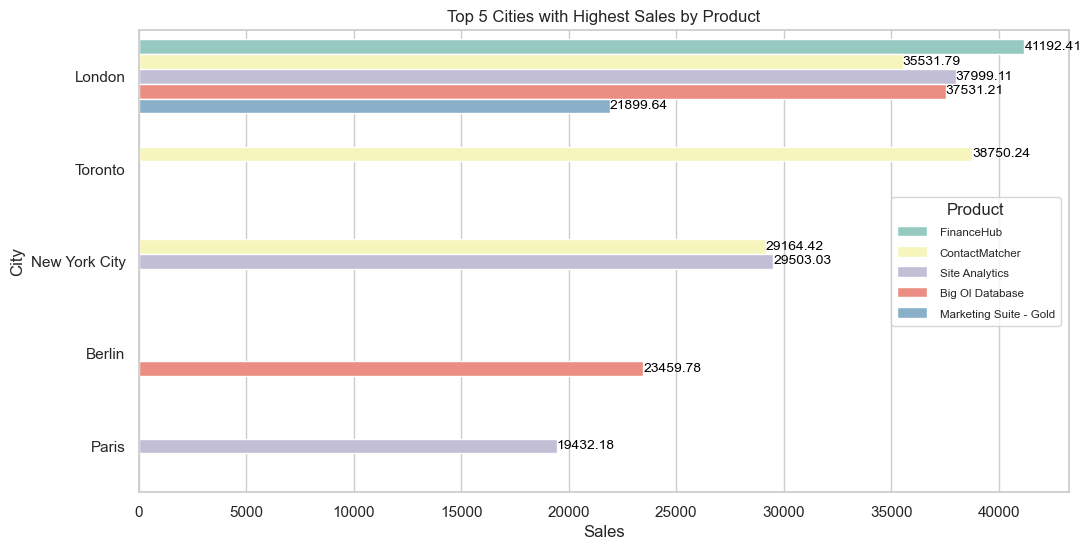

In [64]:
# Kota Penghasil Sales Terbesar beserta Produkya

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Sales', y='City', hue='Product', data=top_biggest_10_category, palette='Set3')
plt.xlabel('Sales')
plt.ylabel('City')
plt.title('Top 5 Cities with Highest Sales by Product')
plt.legend(title='Product')
# Adjust the legend font size to be smaller
legend = plt.legend(title='Product')
for label in legend.get_texts():
    label.set_fontsize('x-small')


# Annotate the bars with the sales values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    
    # Ensure the position is finite
    if width > 0:
        plt.text(x + width, y + height/2, f'{width:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.show()


**London merupakan Kota yang paling besar memberikan nilai penjualan tertinggi, disusul dengan Toronto dan New York City. London mempunyai produk yang paling banyak jenisnya disini, dengan Finance Hub sebagai yang tertinggi penjualannya, kemudian di posisi kedua Site Analytics, Big OI Database, dan posisi paling bawah ada product Contact Matcher.**

In [67]:
# 5 Negara penghasil Profit Terbesar beserta produknya
result_country = df.groupby(['Country','Product'])['Profit'].sum().reset_index()
country_result_high = result_country.sort_values(by='Profit', ascending=False)
top_biggest_5_country = country_result_high.head()
top_biggest_5_country


,Country,Product,Profit
515,United Kingdom,Big Ol Database,17320.0762
525,United Kingdom,Site Analytics,13399.1892
49,Brazil,ContactMatcher,12167.3825
532,United States,Data Smasher,11095.6565
63,Canada,ContactMatcher,10937.8014


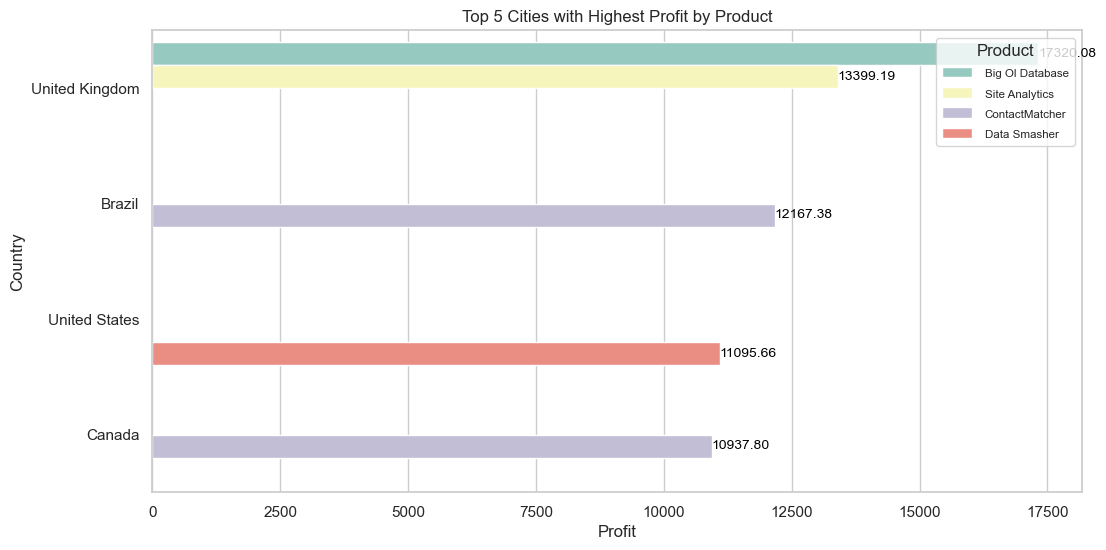

In [69]:
# Kota Penghasil Sales Terbesar beserta Produkya

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Profit', y='Country', hue='Product', data=top_biggest_5_country, palette='Set3')
plt.xlabel('Profit')
plt.ylabel('Country')
plt.title('Top 5 Cities with Highest Profit by Product')
plt.legend(title='Product')
# Adjust the legend font size to be smaller
legend = plt.legend(title='Product')
for label in legend.get_texts():
    label.set_fontsize('x-small')


# Annotate the bars with the sales values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    
    # Ensure the position is finite
    if width > 0:
        plt.text(x + width, y + height/2, f'{width:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.show()


**Keuntungan terbesar diperoleh dari Negara United Kingdom dengan produknya masing-masing yaitu Big OI Database dan Site Analytics, kemudian disusul oleh Brazil diposisi kedua dengan produk ContactMatcher-nya, sedangkan diposisi ketiga dipegang oleh United States dengan produknya Data Smasher.** 

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

In [54]:
# Analisa secara bulanan dan tahunan
# Buat kolom baru yang berisikan hanya bulan dan tahun-nya saja.

df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

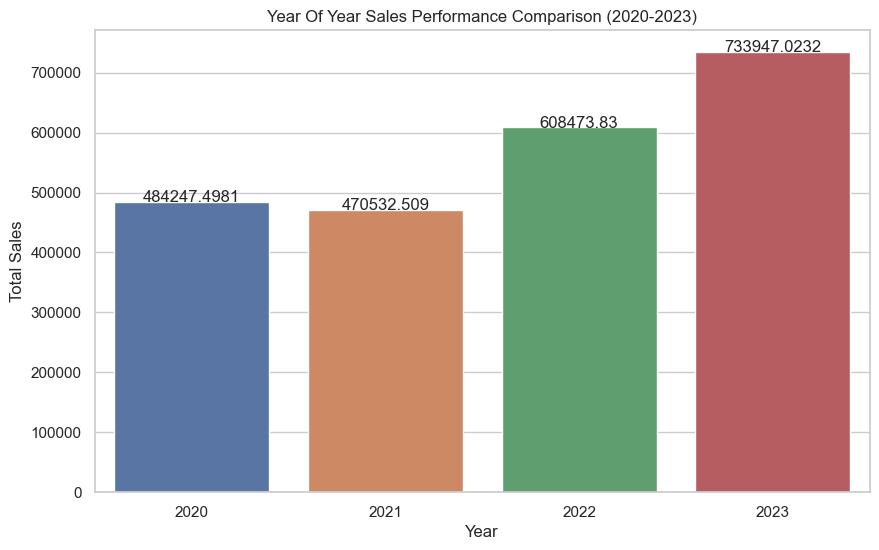

In [55]:
# Kinerja Penjualan/ Sales Perusahaan Tahun ke Tahun selama Periode 2020 hingga 2023

# Filter data for the years 2020 to 2023
filtered_data = df[(df['Order Date'].dt.year >= 2020) & (df['Order Date'].dt.year <= 2023)]

# Create a bar plot for YoY sales performance comparison
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Customize the plot style if desired
sns.set_style("whitegrid")

# Group the filtered data by year and calculate the sum of 'Sales' for each year
yearly_sales = filtered_data.groupby(filtered_data['Order Date'].dt.year)['Sales'].sum()


# Create the bar plot
plot = sns.barplot(x=yearly_sales.index, y=yearly_sales.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Year Of Year Sales Performance Comparison (2020-2023)')

for i in range(yearly_sales.shape[0]):
    plt.text(x=i, y=yearly_sales.values[i], s=yearly_sales.values[i], ha='center')

# Show the plot
plt.show()



**Penjualan perusahaan dari tahun 2020 hingga 2023, sempat mengalami penurunan di tahun 2021 yang kemudian menanjak kembali di tahun 2022 dan 2023. Secara garis besar trend penjualan year of year memiliki trend naik/ positif.** 

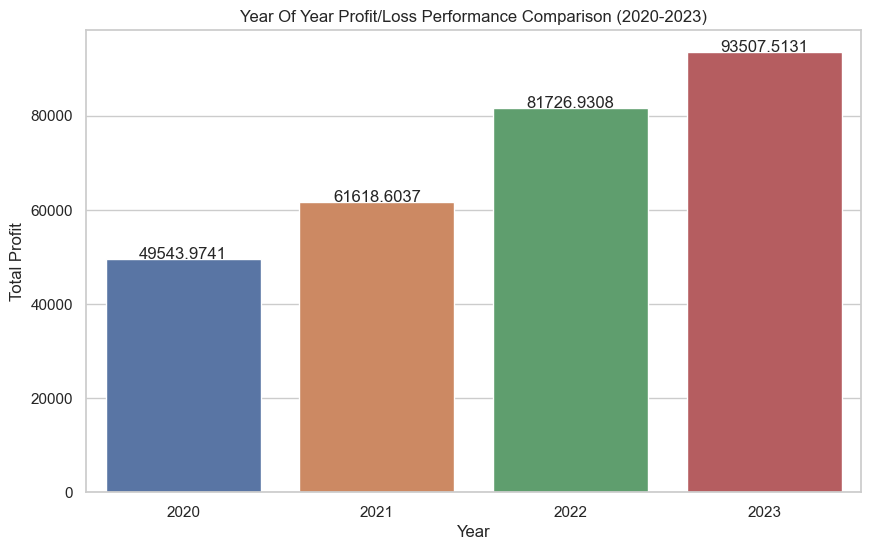

In [56]:
# Kinerja Keuntungan/ Profit Perusahaan Tahun ke Tahun selama Periode 2020 hingga 2023

# Filter data for the years 2020 to 2023
filtered_data = df[(df['Order Date'].dt.year >= 2020) & (df['Order Date'].dt.year <= 2023)]

# Create a bar plot for YoY sales performance comparison
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Customize the plot style if desired
sns.set_style("whitegrid")

# Group the filtered data by year and calculate the sum of 'Sales' for each year
yearly_profit = filtered_data.groupby(filtered_data['Order Date'].dt.year)['Profit'].sum()


# Create the bar plot
plot = sns.barplot(x=yearly_profit.index, y=yearly_profit.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Year Of Year Profit/Loss Performance Comparison (2020-2023)')

for i in range(yearly_profit.shape[0]):
    plt.text(x=i, y=yearly_profit.values[i], s=yearly_profit.values[i], ha='center')

# Show the plot
plt.show()



**Untuk performa Keuntungan/ Laba/ Profit Perusahaan, secara Year of Year sangat positif, yaitu mengalami kenaikan setiap tahunnya dari tahun 2020 hingga 2023.**

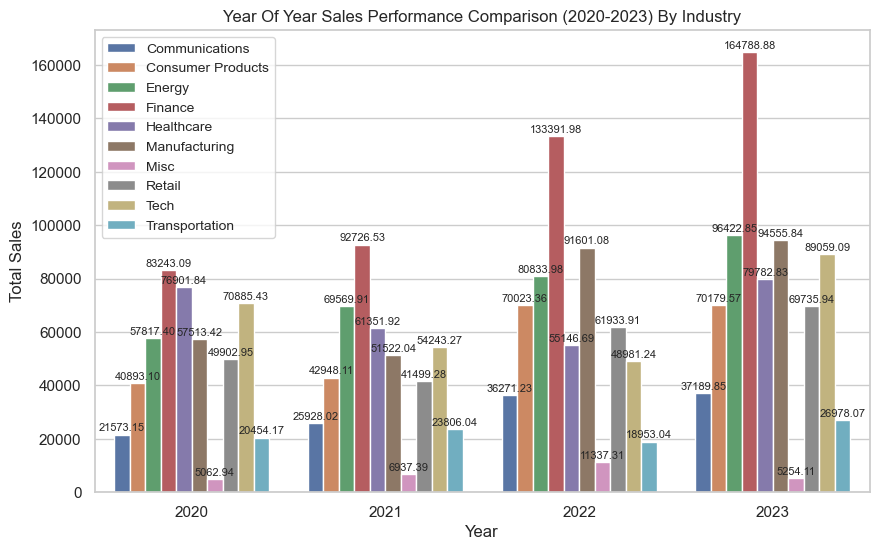

In [71]:
# Kinerja Penjualan/ Sales Perusahaan Tahun ke Tahun selama Periode 2020 hingga 2023 beserta Industrinya

filtered_data = df[(df['Order Date'].dt.year >= 2020) & (df['Order Date'].dt.year <= 2023)]

# Create a bar plot for YoY sales performance comparison
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Customize the plot style if desired
sns.set_style("whitegrid")

# Group the filtered data by year, industry and calculate the sum of 'Sales' for each group
yearly_sales = filtered_data.groupby([filtered_data['Order Date'].dt.year, 'Industry'])['Sales'].sum().reset_index()

# Create the bar plot
plot = sns.barplot(x='Order Date', y='Sales', hue='Industry', data=yearly_sales)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Year Of Year Sales Performance Comparison (2020-2023) By Industry')

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    
    # Ensure the position is finite
    if height > 0:
        plt.text(x + width / 2, y + height + 500, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.legend(fontsize='small')
plt.show()


**Untuk Industri Finance sebagai mesin peraih Penjualan/ Sales terbesar memilik Trend yang bulish secara YoY sehingga memberikan indikator positif. Industri komunikasi mengalami bulish secara YoY sehingga bisa dibilang mempunyai trend yang positif namun nilainya tidak signifikan apabila dilihat dari sektor Industri yang lainnya. Sedangkan untuk Industri lainnya, secara YoY mengalami kontraksi sehingga tidak bisa dikatakan mempunyai trend yang positif**

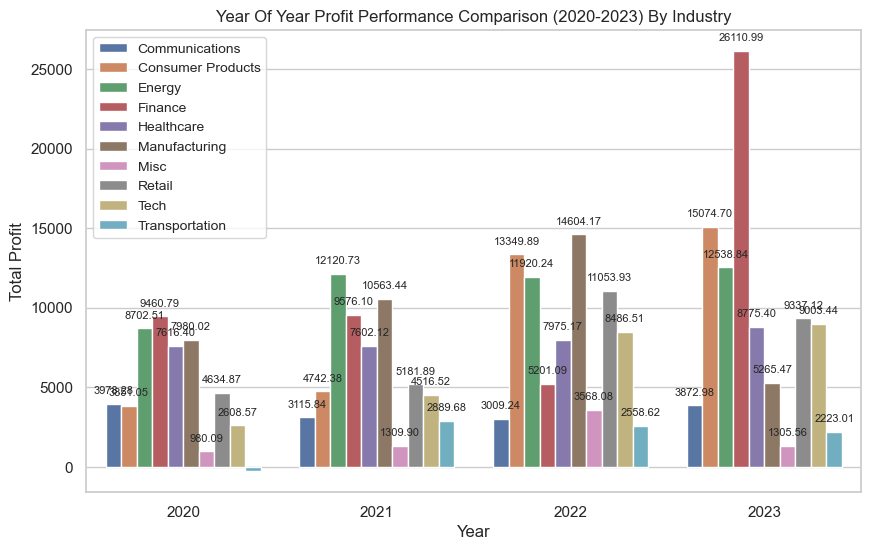

In [73]:
# Kinerja Keuntungan/ Profit Perusahaan Tahun ke Tahun selama Periode 2020 hingga 2023 beserta Industrinya

filtered_data = df[(df['Order Date'].dt.year >= 2020) & (df['Order Date'].dt.year <= 2023)]

# Create a bar plot for YoY profit performance comparison
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Customize the plot style if desired
sns.set_style("whitegrid")

# Group the filtered data by year, industry and calculate the sum of 'Profit' for each group
yearly_profit = filtered_data.groupby([filtered_data['Order Date'].dt.year, 'Industry'])['Profit'].sum().reset_index()

# Create the bar plot
plot = sns.barplot(x='Order Date', y='Profit', hue='Industry', data=yearly_profit)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Year Of Year Profit Performance Comparison (2020-2023) By Industry')

for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    
    # Ensure the position is finite
    if height > 0:
        plt.text(x + width / 2, y + height + 500, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.legend(fontsize='small')
plt.show()


**Industri Consumer Product dan Tech merupakan dua Industri yang mengalami trend peningkatan dalam menghasilkan laba/keuntungan, walaupun nilainya tidak signifikan apabila dibandingkan dengan grafik industri yang lain. Sektor Industri Finance sempat mengalami kontraksi jatuh ditahun 2022 setelah mengalami peningkatan di tahun 2020 dan 2021. Kemudian mengalamai lonjakan yang sangat tajam di tahun 2023.**

## **Findings** ##

Apabila diperhatikan, terdapat nilai Minus (-) pada tabel Year Of Year Profit Performance Comparison (2020-2023) By Industry khusus di tahun 2020 diatas, dalam hal ini mengarah ke sektor produk Transportasi, dimana ini adalah sebuah anomali. Untuk itu diperlukan kajian lebih lanjut atas hal ini. 

In [59]:
# Breakdown transaksi yang menyebabkan kerugian pada sektor Transportasi, khusus ditahun 2020

# Filter data for the year 2020 and the 'Transportation' industry
filtered_data = df[(df['Order Date'].dt.year == 2020) & (df['Industry'] == 'Transportation')]

# Display the 'Order Date', 'Product', and 'Profit' for each order
print("The 'Order Date', 'Product', and 'Profit' for each order in the Transportation industry in 2020 are:")
print(filtered_data[['Order Date', 'Customer','Product','Sales','Discount' ,'Profit']])


The 'Order Date', 'Product', and 'Profit' for each order in the Transportation industry in 2020 are:
     Order Date      Customer                 Product     Sales  Discount  \
124  2020-12-26         FedEx              FinanceHub   600.558       0.3   
164  2020-09-08  Nissan Motor          ChatBot Plugin     9.936       0.2   
165  2020-09-08  Nissan Motor         Big Ol Database  8159.952       0.4   
166  2020-09-08  Nissan Motor  Marketing Suite - Gold   275.928       0.2   
167  2020-09-08  Nissan Motor              FinanceHub  1740.060       0.3   
...         ...           ...                     ...       ...       ...   
9809 2020-11-07  Nissan Motor                 Support    25.920       0.2   
9810 2020-11-07  Nissan Motor          ChatBot Plugin   120.768       0.2   
9832 2020-05-18         FedEx                 Support     3.984       0.2   
9856 2020-11-06         FedEx                 Support    43.680       0.0   
9886 2020-01-24  Nissan Motor                 Storag

Dari data diatas, dapat dilihat bahwa Anomali yang berupa nilai minus (-) pada tabel Profit diatas disebabkan karena adanya transaksi dari Nissan Motor dan FedEX di bulan September tahun 2020 yang diberikan discount. Kemungkinan besar pemberian discount yang dapat menyebabkan nilai minus pada grafik Profit. Namun, untuk nilai kerugiannya masih tidak signifikan. Dapat diabaikan, namun diberikan pencatatan/Notes untuk diperhatikan kedepannya.

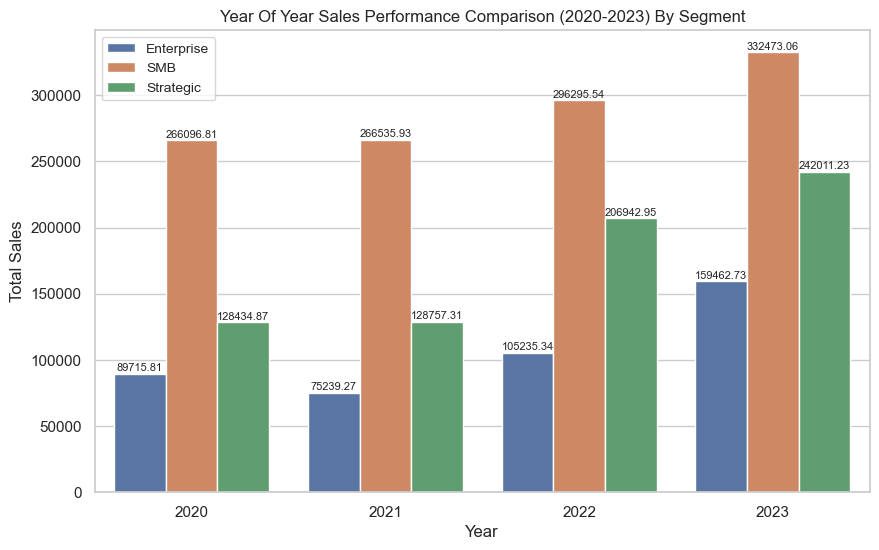

In [74]:
# Kinerja Penjualan/ Sales Perusahaan Tahun ke Tahun selama Periode 2020 hingga 2023 beserta Segmentnya

filtered_data = df[(df['Order Date'].dt.year >= 2020) & (df['Order Date'].dt.year <= 2023)]

# Create a bar plot for YoY sales performance comparison
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Customize the plot style if desired
sns.set_style("whitegrid")

# Group the filtered data by year, industry and calculate the sum of 'Sales' for each group
yearly_sales = filtered_data.groupby([filtered_data['Order Date'].dt.year, 'Segment'])['Sales'].sum().reset_index()

# Create the bar plot
plot = sns.barplot(x='Order Date', y='Sales', hue='Segment', data=yearly_sales)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Year Of Year Sales Performance Comparison (2020-2023) By Segment')

# Add bar values (annotations)
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    
    # Ensure the position is finite
    if height > 0:
        plt.text(x + width / 2, y + height + 500, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.legend(fontsize='small')
plt.show()


**Perolehan Penjualan/ Sales yang diperlihatkan oleh Segment SMB sangat baik, hal ini dapat dilihat dari trend positif yang selalu meningkat secara YoY. Apabila dibandingan dengan segment Enterprise dan Strategic, Segment SMB yang paling mempunyai prospek menjanjikan dilihat dari valuenya yang juga terus naik.**

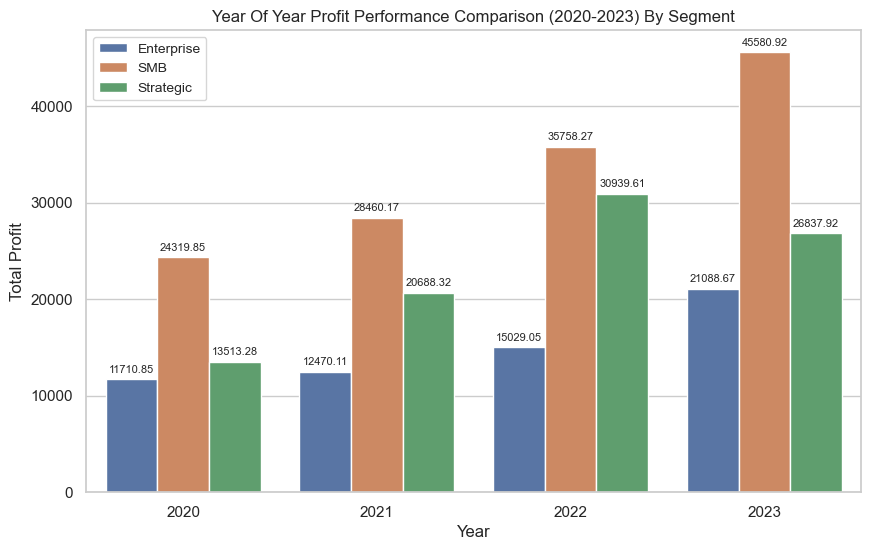

In [76]:
# Kinerja Keuntungan/ Profit Perusahaan Tahun ke Tahun selama Periode 2020 hingga 2023 beserta Segmentnya

filtered_data = df[(df['Order Date'].dt.year >= 2020) & (df['Order Date'].dt.year <= 2023)]

# Create a bar plot for YoY profit performance comparison
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Customize the plot style if desired
sns.set_style("whitegrid")

# Group the filtered data by year, segment and calculate the sum of 'Profit' for each group
yearly_profit = filtered_data.groupby([filtered_data['Order Date'].dt.year, 'Segment'])['Profit'].sum().reset_index()

# Create the bar plot
plot = sns.barplot(x='Order Date', y='Profit', hue='Segment', data=yearly_profit)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Year Of Year Profit Performance Comparison (2020-2023) By Segment')

# Add bar values (annotations)
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    
    # Ensure the position is finite
    if height > 0:
        plt.text(x + width / 2, y + height + 500, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.legend(fontsize='small')
plt.show()


## **Conclusion** ##
Dari hasil analisa diatas apabila mengacu kepada tujuan analisa ini dibuat yaitu untuk melihat kinerja keuangan perusahaan yang diinginkan oleh Stakeholder dalam hal ini investor dan termasuk jajaran manajemen, maka dapat diketahui:
1. Kinerja keuangan dari sektor Industri, Segment, dan Product, apabila melihat pada pola trend YoY periode 2020 - 2023 mengarah ke trend yang positif yang artinya setiap tahun mengalami peningkatan, baik dari sisi sales dan profitnya.
2. Temuan atas anomali-anomali yang berdampak negatif, setelah dianalisa, nilainya tidak signifikan.

Maka dapat disimpulkan bahwa SaaS Company kinerja keuangannya sangat baik dan aman untuk diberikan kesempatan sebagai tempat penanaman modal (Investment).


## **Recommendation** ##
Perusahaan agar bisa memperhatikan Industry Manufaktur dan Teknologi yang pertumbuhannya agak tersendat. Perlu dikaji lebih dalam penyebabnya dengan Board dan anggota Manajemen perusahaan.

In [62]:
# Specify the path to the new Excel file
new_excel_file_path = 'c:\\Users\\Tito Adiyanto\\Downloads\\anyar.xlsx'

# Save the DataFrame to the new Excel file
df.to_excel(new_excel_file_path, index=False)